In [7]:
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt

import time
import heatmap_setup as hm
import numpy as np

from SES_setup import *
from utils import *
from style import *

In [32]:
#import weak_phonons as wp

T_ph = 300.
w_2 = 3500. #1.4*ev_to_inv_cm
bias = w_2*0.01 #0.01*ev_to_inv_cm #0.0000001*ev_to_inv_cm
V = w_2*0.01 #0.01*ev_to_inv_cm #0.00001*ev_to_inv_cm
alpha = 1.
alpha_EM = 5.309e-3 # inv_ps_to_inv_cm *10^-3
N =4
#wc = 50.
w_0 = 100.
Gamma = 2*w_0
T_EM = 2000.

#phonons = np.logspace(-1,np.log10(20),8)

PARAMS = PARAMS_setup(bias=bias, w_2=w_2, V = V, alpha=alpha,
                      T_EM=T_EM, T_ph =T_ph, alpha_EM=alpha_EM, shift=True,
                      num_cpus=4, N=N, Gamma=Gamma, w_0=w_0,
                      silent=True, exc_diff=0)
#print PARAMS['H_sub'].eigenstates()
H, L, L_RWA, PARAMS = get_H_and_L_RWA(PARAMS,silent=False, threshold=0.)


evals, evecs = exciton_states(PARAMS, shift=False)
dark, bright = evecs[0]*evecs[0].dag(), evecs[1]*evecs[1].dag()
eig_x = (evecs[0]*evecs[1].dag() + evecs[1]*evecs[0].dag())*0.5
ops = make_expectation_operators(PARAMS)
site_x = (site_coherence+site_coherence.dag())
print PARAMS['H_sub']

****************************************************************
The operators took 1.91358399391 and have dimension 39.
Building the RC Liouvillian took 2.011 seconds.
It is 1521by1521. The full basis would be 2304by2304
It took  1.1481180191  seconds to build the Non-secular RWA Liouvillian
Full optical Liouvillian took 0.829312086105 seconds.
Chopping reduced the sparsity from 10.104% to 10.104%
Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[    0.     0.     0.]
 [    0.  3535.    35.]
 [    0.    35.  3500.]]


In [33]:
# 1 is weak coupling, room temperature, low freq
timelist = np.linspace(0, 3.0, 2000)

init_sys = XO_proj
#init_sys = ((XO + OX)*(XO + OX).dag())/2.
#print init_sys
print (init_sys*eig_x).tr()

v0 = tensor(init_sys,qt.enr_thermal_dm([N, N], N, Occupation(w_0, T_ph)))
e_ops=[ops['XO'], ops['OX'], ops['sigma_x'], 
       ops['eig_x'], ops['sigma_y'], ops['eig_y'], ops['OO']]
dat1 = qt.mesolve(H[1], v0, timelist, c_ops=[L_RWA], e_ops=e_ops, progress_bar=True)

dat11 = qt.mesolve(H[1], v0, timelist, c_ops=[L], e_ops=e_ops, progress_bar=True)
save_obj([dat11, PARAMS], '3LS_dynamics_1')

(0.4472135955+0j)
10.0%. Run time:   2.18s. Est. time left: 00:00:00:19
20.0%. Run time:   4.72s. Est. time left: 00:00:00:18
30.0%. Run time:   7.37s. Est. time left: 00:00:00:17
40.0%. Run time:   9.48s. Est. time left: 00:00:00:14
50.0%. Run time:  11.57s. Est. time left: 00:00:00:11
60.0%. Run time:  13.95s. Est. time left: 00:00:00:09
70.0%. Run time:  16.49s. Est. time left: 00:00:00:07
80.0%. Run time:  19.54s. Est. time left: 00:00:00:04
90.0%. Run time:  22.58s. Est. time left: 00:00:00:02
Total run time:  25.39s
10.0%. Run time:   2.71s. Est. time left: 00:00:00:24
20.0%. Run time:   5.37s. Est. time left: 00:00:00:21
30.0%. Run time:   7.86s. Est. time left: 00:00:00:18
40.0%. Run time:  11.13s. Est. time left: 00:00:00:16
50.0%. Run time:  13.60s. Est. time left: 00:00:00:13
60.0%. Run time:  16.77s. Est. time left: 00:00:00:11
70.0%. Run time:  20.11s. Est. time left: 00:00:00:08
80.0%. Run time:  22.78s. Est. time left: 00:00:00:05
90.0%. Run time:  25.32s. Est. time left

In [ ]:
plt.figure(figsize=(7,5))
ss = steadystate(H[1], [L_RWA])
plt.axhline((ss*ops['XO']).tr().real)
plt.plot(timelist, dat1.expect[0], label='RWA' , c='r')
plt.plot(timelist, dat11.expect[0], label='Full', c='b')
plt.plot(timelist, dat1.expect[1], c='r')
plt.plot(timelist, dat11.expect[1], c='b')
plt.figure(figsize=(7,5))
plt.plot(timelist, dat1.expect[2], label='RWA')
plt.plot(timelist, dat11.expect[2], label='Full')
plt.figure(figsize=(7,5))
plt.plot(timelist, dat1.expect[3], label='RWA')
plt.plot(timelist, dat11.expect[3], label='Full')
plt.axhline((ss*ops['eig_x']).tr().real, c='k')
plt.ylim(-0.001,0.001)
plt.figure(figsize=(7,5))
plt.axhline((ss*ops['OO']).tr().real, c='k')
plt.plot(timelist, dat1.expect[6], label='RWA')
plt.plot(timelist, dat11.expect[6], label='Full')
plt.legend()

In [ ]:
T_ph = 300.
w_2 = 3500. #1.4*ev_to_inv_cm
bias = w_2*0.01 #0.01*ev_to_inv_cm #0.0000001*ev_to_inv_cm
V = w_2*0.01 #0.01*ev_to_inv_cm #0.00001*ev_to_inv_cm
alpha = 10.
alpha_EM = 5.309e-3 # inv_ps_to_inv_cm *10^-3
N =5
#wc = 50.
w_0 = 100.
Gamma = 2*w_0
T_EM = 2000.

#phonons = np.logspace(-1,np.log10(20),8)

PARAMS = PARAMS_setup(bias=bias, w_2=w_2, V = V, alpha=alpha,
                      T_EM=T_EM, T_ph =T_ph, alpha_EM=alpha_EM, shift=True,
                      num_cpus=4, N=N, Gamma=Gamma, w_0=w_0,
                      silent=True, exc_diff=0)
#print PARAMS['H_sub'].eigenstates()
H, L, L_RWA, PARAMS = get_H_and_L_RWA(PARAMS,silent=False, threshold=0.)


evals, evecs = exciton_states(PARAMS, shift=False)
dark, bright = evecs[0]*evecs[0].dag(), evecs[1]*evecs[1].dag()
eig_x = (evecs[0]*evecs[1].dag() + evecs[1]*evecs[0].dag())*0.5
ops = make_expectation_operators(PARAMS)
site_x = (site_coherence+site_coherence.dag())

In [19]:
print (steadystate(H[1], [L_RWA])*ops['dark']).tr()
print (steadystate(H[1], [L])*ops['dark']).tr()

(0.511675411038-2.11758236814e-22j)
(0.511675411047+0j)


In [ ]:
timelist = np.linspace(0, 1.9, 1900)

init_sys = XO_proj
#init_sys = ((XO + OX)*(XO + OX).dag())/2.
#print init_sys
print (init_sys*eig_x).tr()

v0 = tensor(init_sys,qt.enr_thermal_dm([N, N], N, Occupation(w_0, T_ph)))

dat2 = qt.mesolve(H[1], v0, timelist, c_ops=[L_RWA], 
                  e_ops=[ops['XO'], ops['OX'], ops['sigma_x'], ops['eig_x'], ops['sigma_y'], ops['eig_y']], 
                  progress_bar=True)

dat22 = qt.mesolve(H[1], v0, timelist, c_ops=[L], 
                  e_ops=[ops['XO'], ops['OX'], ops['sigma_x'], ops['eig_x'], ops['sigma_y'], ops['eig_y']], 
                  progress_bar=True)
save_obj([dat22, PARAMS], '3LS_dynamics_2')

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(timelist, dat2.expect[0], label='RWA')
plt.plot(timelist, dat22.expect[0], label='Full')

plt.figure(figsize=(7,5))
plt.plot(timelist, dat2.expect[2], label='RWA')
plt.plot(timelist, dat22.expect[2], label='Full')

plt.figure(figsize=(7,5))
plt.plot(timelist, dat2.expect[3], label='RWA')
plt.plot(timelist, dat22.expect[3], label='Full')

plt.legend()


In [ ]:
T_ph = 300.
w_2 = 3500. #1.4*ev_to_inv_cm
bias = w_2*0.01 #0.01*ev_to_inv_cm #0.0000001*ev_to_inv_cm
V = w_2*0.01 #0.01*ev_to_inv_cm #0.00001*ev_to_inv_cm
alpha = 40.
alpha_EM = 5.309e-3 # inv_ps_to_inv_cm *10^-3
N =6
#wc = 50.
w_0 = 100.
Gamma = 2*w_0
T_EM = 2000.

#phonons = np.logspace(-1,np.log10(20),8)

PARAMS = PARAMS_setup(bias=bias, w_2=w_2, V = V, alpha=alpha,
                      T_EM=T_EM, T_ph =T_ph, alpha_EM=alpha_EM, shift=True,
                      num_cpus=4, N=N, Gamma=Gamma, w_0=w_0,
                      silent=True, exc_diff=0)
#print PARAMS['H_sub'].eigenstates()
H, L, L_RWA, PARAMS = get_H_and_L_RWA(PARAMS,silent=False, threshold=0.)


evals, evecs = exciton_states(PARAMS, shift=False)
dark, bright = evecs[0]*evecs[0].dag(), evecs[1]*evecs[1].dag()
eig_x = (evecs[0]*evecs[1].dag() + evecs[1]*evecs[0].dag())*0.5
ops = make_expectation_operators(PARAMS)
site_x = (site_coherence+site_coherence.dag())

In [23]:
print (steadystate(H[1], [L_RWA])*ops['dark']).tr()
print (steadystate(H[1], [L])*ops['dark']).tr()

(0.328776845358+0j)
(0.32883124258+0j)


In [ ]:
timelist = np.linspace(0, 1.9, 1900)

init_sys = XO_proj
#init_sys = ((XO + OX)*(XO + OX).dag())/2.
#print init_sys
print (init_sys*eig_x).tr()

v0 = tensor(init_sys,qt.enr_thermal_dm([N, N], N, Occupation(w_0, T_ph)))

dat3 = qt.mesolve(H[1], v0, timelist, c_ops=[L_RWA], 
                  e_ops=[ops['XO'], ops['OX'], ops['sigma_x'], ops['eig_x'], ops['sigma_y'], ops['eig_y']], 
                  progress_bar=True)

dat33 = qt.mesolve(H[1], v0, timelist, c_ops=[L], 
                  e_ops=[ops['XO'], ops['OX'], ops['sigma_x'], ops['eig_x'], ops['sigma_y'], ops['eig_y']], 
                  progress_bar=True)
save_obj([dat33, PARAMS], '3LS_dynamics_3')

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(timelist, dat3.expect[0], label='RWA')
plt.plot(timelist, dat33.expect[0], label='Full')

plt.figure(figsize=(10,6))
plt.plot(timelist, dat3.expect[2], label='RWA')
plt.plot(timelist, dat33.expect[2], label='Full')


plt.figure(figsize=(10,6))
plt.plot(timelist, dat3.expect[3], label='RWA')
plt.plot(timelist, dat33.expect[3], label='Full')

plt.legend()


In [ ]:
T_ph = 77.
w_2 = 3500. #1.4*ev_to_inv_cm
bias = w_2*0.01 #0.01*ev_to_inv_cm #0.0000001*ev_to_inv_cm
V = w_2*0.01 #0.01*ev_to_inv_cm #0.00001*ev_to_inv_cm
alpha = 10.
alpha_EM = 5.309e-3 # inv_ps_to_inv_cm *10^-3
N =5
#wc = 50.
w_0 = 100.
Gamma = 2*w_0
T_EM = 2000.

#phonons = np.logspace(-1,np.log10(20),8)

PARAMS = PARAMS_setup(bias=bias, w_2=w_2, V = V, alpha=alpha,
                      T_EM=T_EM, T_ph =T_ph, alpha_EM=alpha_EM, shift=True,
                      num_cpus=4, N=N, Gamma=Gamma, w_0=w_0,
                      silent=True, exc_diff=0)
#print PARAMS['H_sub'].eigenstates()
H, L, L_RWA, PARAMS = get_H_and_L_RWA(PARAMS,silent=False, threshold=0.)


evals, evecs = exciton_states(PARAMS, shift=False)
dark, bright = evecs[0]*evecs[0].dag(), evecs[1]*evecs[1].dag()
eig_x = (evecs[0]*evecs[1].dag() + evecs[1]*evecs[0].dag())*0.5
ops = make_expectation_operators(PARAMS)
site_x = (site_coherence+site_coherence.dag())


timelist = np.linspace(0, 1.9, 1900)

init_sys = XO_proj
#init_sys = ((XO + OX)*(XO + OX).dag())/2.
#print init_sys
print (init_sys*eig_x).tr()

v0 = tensor(init_sys,qt.enr_thermal_dm([N, N], N, Occupation(w_0, T_ph)))

dat4 = qt.mesolve(H[1], v0, timelist, c_ops=[L_RWA], 
                  e_ops=[ops['XO'], ops['OX'], ops['sigma_x'], ops['eig_x'], ops['sigma_y'], ops['eig_y']], 
                  progress_bar=True)

dat44 = qt.mesolve(H[1], v0, timelist, c_ops=[L], 
                  e_ops=[ops['XO'], ops['OX'], ops['sigma_x'], ops['eig_x'], ops['sigma_y'], ops['eig_y']], 
                  progress_bar=True)
save_obj([dat44, PARAMS], '3LS_dynamics_4')

# Steadystates as a function of coupling strength

In [ ]:
phonons = np.linspace(0.0, 100, 50)
T_ph = 300.
w_2 = 1000. #1.4*ev_to_inv_cm
bias = 10. #0.01*ev_to_inv_cm #0.0000001*ev_to_inv_cm
V = 50. #0.01*ev_to_inv_cm #0.00001*ev_to_inv_cm
alpha = 50.
alpha_EM = 5.309e-3 # inv_ps_to_inv_cm *10^-3
N =6
#wc = 50.
w_0 = 50.
Gamma = 2*w_0

rho_rwa = []
rho_full = []

for alpha in phonons:
    PARAMS = PARAMS_setup(bias=bias, w_2=w_2, 
                          V = V, alpha=alpha,
                          T_EM=6000., T_ph =T_ph, alpha_EM=alpha_EM, shift=True,
                          num_cpus=4, N=N, Gamma=Gamma, w_0=w_0,
                          silent=True, exc_diff=0)
    #energies, states = exciton_states(PARAMS)
    H, L, L_RWA, PARAMS = get_H_and_L_RWA(PARAMS, silent=True, threshold=1e-9)
    
    rho_rwa.append(steadystate(H[1], [L_RWA]))
    rho_full.append(steadystate(H[1], [L]))
    print alpha
    #print ss.diag()
print 'Calculation complete'

In [ ]:
ops = make_expectation_operators(PARAMS)

f, ((ax1, ax2),(ax3, ax4))  = plt.subplots(2, 2, sharex=True, figsize=(12,6))

ax1.plot(phonons, [(r*ops['OO']).tr() for r in rho_rwa][1:-1], label='RWA')
ax1.plot(phonons, [(r*ops['OO']).tr() for r in rho_full][1:-1], label='full')
#plt.xlabel(r"$\alpha_1$, $\alpha_2$ $(cm^{-1})$")
ax1.set_ylabel(r"GS")
ax1.set_xlim(phonons[0], phonons[-1])
ax1.legend()

ax2.plot(phonons, [(r*ops['dark']).tr() for r in rho_rwa][1:-1], label='RWA')
ax2.plot(phonons, [(r*ops['dark']).tr() for r in rho_full][1:-1], label='full')
#ax2.set_xlabel(r"$\alpha_1$, $\alpha_2$ $(cm^{-1})$")
ax2.set_ylabel(r"DS")
ax2.legend()


ax3.plot(phonons, [(r*ops['bright']).tr() for r in rho_rwa][1:-1], label='RWA')
ax3.plot(phonons, [(r*ops['bright']).tr() for r in rho_full][1:-1], label='full')
ax3.set_xlabel(r"$\alpha_1$, $\alpha_2$ $(cm^{-1})$")
ax3.set_ylabel(r"BS")
ax3.legend()


ax4.plot(phonons, [(r*ops['eig_x']).tr() for r in rho_rwa][1:-1], label='RWA')
ax4.plot(phonons, [(r*ops['eig_x']).tr() for r in rho_full][1:-1], label='full')
ax4.set_xlabel(r"$\alpha_1$, $\alpha_2$ $(cm^{-1})$")
ax4.set_ylabel(r"$\tilde{\sigma}_x$")
ax4.legend()
plt.show()
#plt.savefig("PLOTS/Redfield-CC.pdf")

# larger $\omega_0$

In [15]:
phonons = np.linspace(1, 100, 50)
T_ph = 300.
w_2 = 1000. #1.4*ev_to_inv_cm
bias = 10. #0.01*ev_to_inv_cm #0.0000001*ev_to_inv_cm
V = 50. #0.01*ev_to_inv_cm #0.00001*ev_to_inv_cm
alpha = 50.
alpha_EM = 5.309e-3 # inv_ps_to_inv_cm *10^-3
N =6
#wc = 50.
w_0 = 500.
Gamma = 2*w_0

rho_rwa = []
rho_full = []

for alpha in phonons:
    PARAMS = PARAMS_setup(bias=bias, w_2=w_2, 
                          V = V, alpha=alpha,
                          T_EM=6000., T_ph =T_ph, alpha_EM=alpha_EM, shift=True,
                          num_cpus=4, N=N, Gamma=Gamma, w_0=w_0,
                          silent=True, exc_diff=0)
    #energies, states = exciton_states(PARAMS)
    H, L, L_RWA, PARAMS = get_H_and_L_RWA(PARAMS, silent=True, threshold=1e-9)
    
    rho_rwa.append(steadystate(H[1], [L_RWA]))
    rho_full.append(steadystate(H[1], [L]))
    print alpha
    #print ss.diag()
print 'Calculation complete'

1.0
3.02040816327
5.04081632653
7.0612244898
9.08163265306
11.1020408163
13.1224489796
15.1428571429
17.1632653061
19.1836734694
21.2040816327
23.2244897959
25.2448979592
27.2653061224
29.2857142857
31.306122449
33.3265306122
35.3469387755
37.3673469388
39.387755102
41.4081632653
43.4285714286
45.4489795918
47.4693877551
49.4897959184
51.5102040816
53.5306122449
55.5510204082
57.5714285714
59.5918367347
61.612244898
63.6326530612
65.6530612245
67.6734693878
69.693877551
71.7142857143
73.7346938776
75.7551020408
77.7755102041
79.7959183673
81.8163265306
83.8367346939
85.8571428571
87.8775510204
89.8979591837
91.9183673469
93.9387755102
95.9591836735
97.9795918367
100.0
Calculation complete


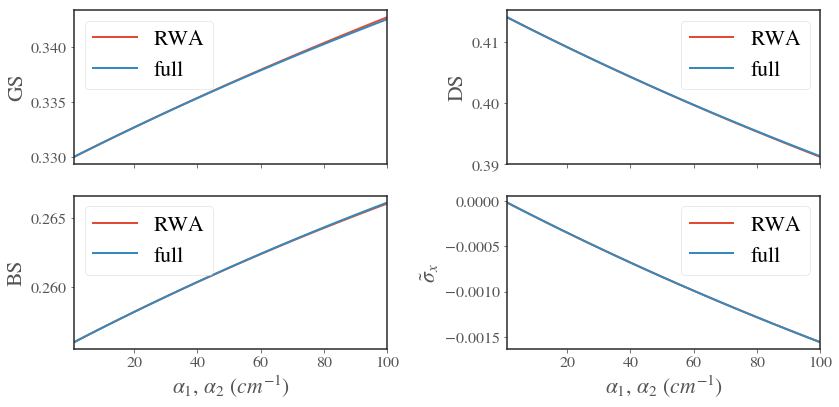

In [16]:
ops = make_expectation_operators(PARAMS)

f, ((ax1, ax2),(ax3, ax4))  = plt.subplots(2, 2, sharex=True, figsize=(12,6))

ax1.plot(phonons, [(r*ops['OO']).tr() for r in rho_rwa], label='RWA')
ax1.plot(phonons, [(r*ops['OO']).tr() for r in rho_full], label='full')
#plt.xlabel(r"$\alpha_1$, $\alpha_2$ $(cm^{-1})$")
ax1.set_ylabel(r"GS")
ax1.set_xlim(phonons[0], phonons[-1])
ax1.legend()

ax2.plot(phonons, [(r*ops['dark']).tr() for r in rho_rwa], label='RWA')
ax2.plot(phonons, [(r*ops['dark']).tr() for r in rho_full], label='full')
#ax2.set_xlabel(r"$\alpha_1$, $\alpha_2$ $(cm^{-1})$")
ax2.set_ylabel(r"DS")
ax2.legend()


ax3.plot(phonons, [(r*ops['bright']).tr() for r in rho_rwa], label='RWA')
ax3.plot(phonons, [(r*ops['bright']).tr() for r in rho_full], label='full')
ax3.set_xlabel(r"$\alpha_1$, $\alpha_2$ $(cm^{-1})$")
ax3.set_ylabel(r"BS")
ax3.legend()

ax4.plot(phonons, [(r*ops['eig_x']).tr() for r in rho_rwa], label='RWA')
ax4.plot(phonons, [(r*ops['eig_x']).tr() for r in rho_full], label='full')
ax4.set_xlabel(r"$\alpha_1$, $\alpha_2$ $(cm^{-1})$")
ax4.set_ylabel(r"$\tilde{\sigma}_x$")
ax4.legend()
plt.show()

In [30]:
w_0 = 125.
Gamma = 2*w_0
phonons = np.linspace(0., 50, 50)

rho_s = []
rho_wc = []
rho_sadd = []

for alpha in phonons:
    PARAMS = PARAMS_setup(bias=bias, w_2=w_2, 
                          V = V, alpha=alpha,
                          T_EM=6000., T_ph =T_ph, alpha_EM=alpha_EM, shift=True,
                          num_cpus=4, N=5, Gamma=Gamma, w_0=w_0,
                          silent=True, exc_diff=0)
    #energies, states = exciton_states(PARAMS)
    H, L_ns, L_s  = get_H_and_L_wc(PARAMS['H_sub'], PARAMS)
    Hs, Ls, Ladd, PARAMS = get_H_and_L(PARAMS, silent=True, threshold=0.)
    rho_s.append(steadystate(Hs[1], [-Ls]))
    rho_sadd.append(steadystate(Hs[1], [-Ladd]))
    rho_wc.append(steadystate(PARAMS['H_sub'], [L_ns]))
    
    #print ss.diag()
print 'Calculation complete'

It took 0.0130219459534 seconds to build the phenomenological Liouvillian
Non-secular and secular dissipators calculated
It took 0.0350728034973 seconds to build the phenomenological Liouvillian
Non-secular and secular dissipators calculated
It took 0.0259671211243 seconds to build the phenomenological Liouvillian
Non-secular and secular dissipators calculated
It took 0.0190758705139 seconds to build the phenomenological Liouvillian
Non-secular and secular dissipators calculated
It took 0.00964999198914 seconds to build the phenomenological Liouvillian
Non-secular and secular dissipators calculated
It took 0.0427241325378 seconds to build the phenomenological Liouvillian
Non-secular and secular dissipators calculated
It took 0.00985193252563 seconds to build the phenomenological Liouvillian
Non-secular and secular dissipators calculated
It took 0.0100572109222 seconds to build the phenomenological Liouvillian
Non-secular and secular dissipators calculated
It took 0.0112709999084 second

In [34]:
#phonons = phonons[1:-1]
#rho_s = rho_s[1:-1]
rho_sadd = rho_sadd[1:-1]
#rho_wc = rho_wc[1:-1]

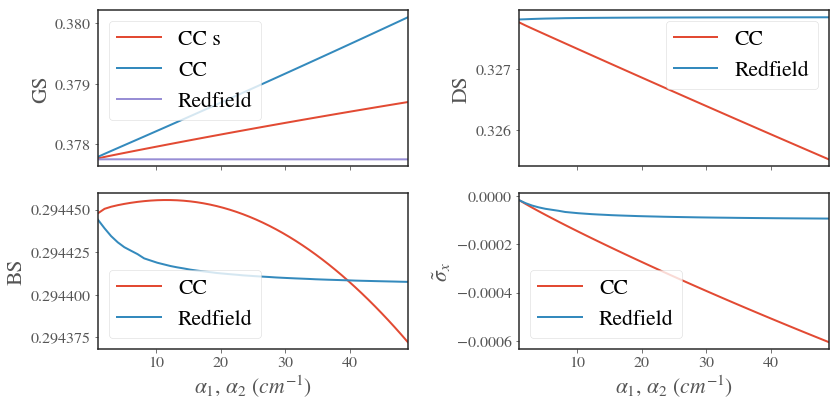

In [35]:
f, ((ax1, ax2),(ax3, ax4))  = plt.subplots(2, 2, sharex=True, figsize=(12,6))

ax1.plot(phonons, [(r*ops['OO']).tr() for r in rho_sadd], label='CC s')
ax1.plot(phonons, [(r*ops['OO']).tr() for r in rho_s], label='CC')
ax1.plot(phonons, [(r*OO_proj).tr() for r in rho_wc], label='Redfield')
#plt.xlabel(r"$\alpha_1$, $\alpha_2$ $(cm^{-1})$")
ax1.set_ylabel(r"GS")
ax1.set_xlim(phonons[0], phonons[-1])
ax1.legend()

ax2.plot(phonons, [(r*ops['dark']).tr() for r in rho_s], label='CC')
ax2.plot(phonons, [(r*ops['dark']).tr() for r in rho_s], label='CC')
ax2.plot(phonons, [(r*dark).tr() for r in rho_wc], label='Redfield')
#ax2.set_xlabel(r"$\alpha_1$, $\alpha_2$ $(cm^{-1})$")
ax2.set_ylabel(r"DS")
ax2.legend()


ax3.plot(phonons, [(r*ops['bright']).tr() for r in rho_s], label='CC')
ax3.plot(phonons, [(r*bright).tr() for r in rho_wc], label='Redfield')
ax3.set_xlabel(r"$\alpha_1$, $\alpha_2$ $(cm^{-1})$")
ax3.set_ylabel(r"BS")
ax3.legend()


ax4.plot(phonons, [(r*ops['eig_x']).tr() for r in rho_s], label='CC')
ax4.plot(phonons, [(r*eig_x).tr() for r in rho_wc], label='Redfield')
ax4.set_xlabel(r"$\alpha_1$, $\alpha_2$ $(cm^{-1})$")
ax4.set_ylabel(r"$\tilde{\sigma}_x$")
ax4.legend()
plt.show()

In [25]:
# THis used N=5 which is too small. USing a larger N leads to much better agreement

In [36]:
w_0 = 125.
Gamma = 2*w_0
phonons = np.linspace(0., 50, 50)

rho_s = []
rho_wc = []
rho_sadd = []

for alpha in phonons:
    PARAMS = PARAMS_setup(bias=bias, w_2=w_2, 
                          V = V, alpha=alpha,
                          T_EM=6000., T_ph =T_ph, alpha_EM=alpha_EM, shift=True,
                          num_cpus=4, N=6, Gamma=Gamma, w_0=w_0,
                          silent=True, exc_diff=0)
    #energies, states = exciton_states(PARAMS)
    H, L_ns, L_s  = get_H_and_L_wc(PARAMS['H_sub'], PARAMS)
    Hs, Ls, Ladd, PARAMS = get_H_and_L(PARAMS, silent=True, threshold=0.)
    rho_s.append(steadystate(Hs[1], [-Ls]))
    rho_sadd.append(steadystate(Hs[1], [-Ladd]))
    rho_wc.append(steadystate(PARAMS['H_sub'], [L_ns]))
    
    #print ss.diag()
print 'Calculation complete'

It took 0.013603925705 seconds to build the phenomenological Liouvillian
Non-secular and secular dissipators calculated
It took 0.00960493087769 seconds to build the phenomenological Liouvillian
Non-secular and secular dissipators calculated
It took 0.0100479125977 seconds to build the phenomenological Liouvillian
Non-secular and secular dissipators calculated
It took 0.0098819732666 seconds to build the phenomenological Liouvillian
Non-secular and secular dissipators calculated
It took 0.0100710391998 seconds to build the phenomenological Liouvillian
Non-secular and secular dissipators calculated
It took 0.00977993011475 seconds to build the phenomenological Liouvillian
Non-secular and secular dissipators calculated
It took 0.0100820064545 seconds to build the phenomenological Liouvillian
Non-secular and secular dissipators calculated
It took 0.0100860595703 seconds to build the phenomenological Liouvillian
Non-secular and secular dissipators calculated
It took 0.0097291469574 seconds